# Classification challenge

During next hours we will compete to build a classifier of natural scenes using a [dataset provided by NCTU](https://www.kaggle.com/c/cs-ioc5008-hw1/overview) (National Chiao Tung University, Taiwan).

[Leaderboard](https://www.kaggle.com/c/cs-ioc5008-hw1/leaderboard)

# Don't forget to configure the execution environment to run in GPU

## Download images from Google Drive

In [1]:
# Import Google Drive libraries
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Authenticate with your Google Account
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
# Download the dataset of the challenge
download = drive.CreateFile({'id': '1DeEJ_LtbgIYPLYcPu3bD818iKXH_w8ru'})
download.GetContentFile('challenge.zip')

In [5]:
# Extract the files
import zipfile
from pathlib import Path
data_path = Path("./challenge.zip")

with zipfile.ZipFile(str(data_path), 'r') as zip_ref:
    zip_ref.extractall("./data")

In [6]:
ls

adc.json  challenge.zip  data/  sample_data/


In [7]:
ls data

test/  train/


In [8]:
ls data/train

bedroom/  highway/     livingroom/  opencountry/  tallbuilding/
coast/    insidecity/  mountain/    street/
forest/   kitchen/     office/      suburb/


In [9]:
ls data/train/bedroom

image_0000.jpg  image_0028.jpg  image_0056.jpg  image_0084.jpg  image_0112.jpg
image_0001.jpg  image_0029.jpg  image_0057.jpg  image_0085.jpg  image_0113.jpg
image_0002.jpg  image_0030.jpg  image_0058.jpg  image_0086.jpg  image_0114.jpg
image_0003.jpg  image_0031.jpg  image_0059.jpg  image_0087.jpg  image_0115.jpg
image_0004.jpg  image_0032.jpg  image_0060.jpg  image_0088.jpg  image_0116.jpg
image_0005.jpg  image_0033.jpg  image_0061.jpg  image_0089.jpg  image_0117.jpg
image_0006.jpg  image_0034.jpg  image_0062.jpg  image_0090.jpg  image_0118.jpg
image_0007.jpg  image_0035.jpg  image_0063.jpg  image_0091.jpg  image_0119.jpg
image_0008.jpg  image_0036.jpg  image_0064.jpg  image_0092.jpg  image_0120.jpg
image_0009.jpg  image_0037.jpg  image_0065.jpg  image_0093.jpg  image_0121.jpg
image_0010.jpg  image_0038.jpg  image_0066.jpg  image_0094.jpg  image_0122.jpg
image_0011.jpg  image_0039.jpg  image_0067.jpg  image_0095.jpg  image_0123.jpg
image_0012.jpg  image_0040.jpg  image_0068.jpg  imag

In [10]:
ls data/test

image_0000.jpg  image_0208.jpg  image_0416.jpg  image_0624.jpg  image_0832.jpg
image_0001.jpg  image_0209.jpg  image_0417.jpg  image_0625.jpg  image_0833.jpg
image_0002.jpg  image_0210.jpg  image_0418.jpg  image_0626.jpg  image_0834.jpg
image_0003.jpg  image_0211.jpg  image_0419.jpg  image_0627.jpg  image_0835.jpg
image_0004.jpg  image_0212.jpg  image_0420.jpg  image_0628.jpg  image_0836.jpg
image_0005.jpg  image_0213.jpg  image_0421.jpg  image_0629.jpg  image_0837.jpg
image_0006.jpg  image_0214.jpg  image_0422.jpg  image_0630.jpg  image_0838.jpg
image_0007.jpg  image_0215.jpg  image_0423.jpg  image_0631.jpg  image_0839.jpg
image_0008.jpg  image_0216.jpg  image_0424.jpg  image_0632.jpg  image_0840.jpg
image_0009.jpg  image_0217.jpg  image_0425.jpg  image_0633.jpg  image_0841.jpg
image_0010.jpg  image_0218.jpg  image_0426.jpg  image_0634.jpg  image_0842.jpg
image_0011.jpg  image_0219.jpg  image_0427.jpg  image_0635.jpg  image_0843.jpg
image_0012.jpg  image_0220.jpg  image_0428.jpg  imag

# Let's hack some code!

In [12]:
from fastai.vision import *

# Explore the data

torch.Size([3, 219, 331])


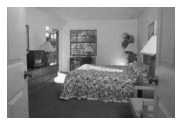

In [17]:
# Show image and size
path = "data/train/"
img_name = "image_0032.jpg"
img = open_image(path + "bedroom/" + img_name)
img.show()
print(img.shape)

In [40]:
import torchvision
from torchvision.transforms import Compose, Resize, ToTensor, Scale
from torch.utils.data import DataLoader, SubsetRandomSampler
transform = Compose([Scale((32,32)),ToTensor()])
dataset = torchvision.datasets.ImageFolder("data/train", transform=transform)

In [41]:
def get_subset(indices, start, end):
    return indices[start : start + end]


TRAIN_PCT, VALIDATION_PCT = 0.7, 0.15  # rest will go for test
train_count = int(len(dataset) * TRAIN_PCT)
validation_count = int(len(dataset) * TRAIN_PCT)

indices = torch.randperm(len(dataset))

train_indices = get_subset(indices, 0, train_count)
validation_indices = get_subset(indices, train_count, validation_count)
test_indices = get_subset(indices, train_count + validation_count, len(dataset))

In [42]:
batch_size = 256
dataloaders = {
    "train": DataLoader(
        dataset, sampler=SubsetRandomSampler(train_indices), batch_size= batch_size
    ),
    "validation": DataLoader(
        dataset, sampler=SubsetRandomSampler(validation_indices), batch_size= batch_size
    ),
    "test": DataLoader(
        dataset, sampler=SubsetRandomSampler(test_indices), batch_size= batch_size
    ),
}

# Experiment

In [62]:
# Load data
batch_size = 32
size = 128
data = ImageDataBunch.from_folder(path="data", train="train", test="test", 
                                  valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=size, 
                                  bs=batch_size
                                  ).normalize(imagenet_stats)

In [63]:
data.classes

['bedroom',
 'coast',
 'forest',
 'highway',
 'insidecity',
 'kitchen',
 'livingroom',
 'mountain',
 'office',
 'opencountry',
 'street',
 'suburb',
 'tallbuilding']

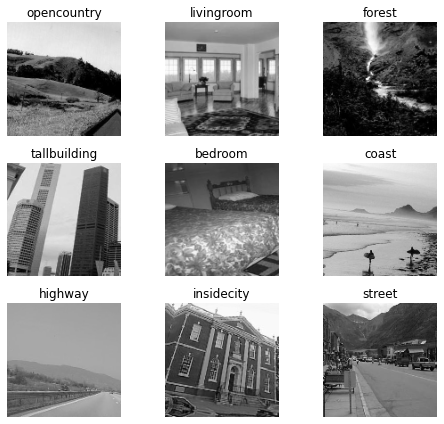

In [64]:
data.show_batch(rows=3, figsize=(7,6))

In [65]:
learn = cnn_learner(data, models.densenet201, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


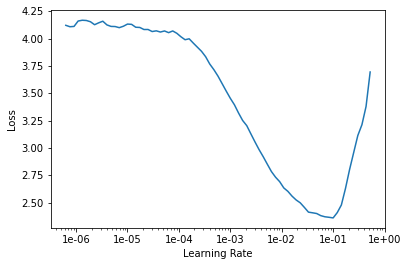

In [66]:
learn.lr_find()
learn.recorder.plot()

In [67]:
lr = 1e-02
learn.fit_one_cycle(5, max_lr=slice(lr/100, lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.990419,0.493170,0.840142,00:16
1,0.808101,0.635221,0.843695,00:15
2,0.584661,0.469890,0.884547,00:15
3,0.416670,0.309023,0.918295,00:15
4,0.299087,0.280014,0.909414,00:15


In [68]:
# Unfreeze conv layers
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


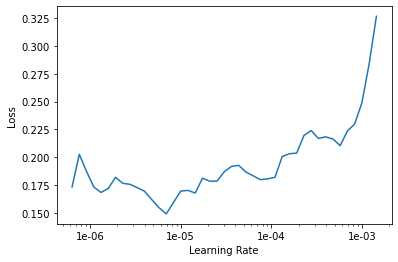

In [69]:
learn.lr_find()
learn.recorder.plot()

In [71]:
lr = 6e-04
learn.fit_one_cycle(5, max_lr=slice(lr/100, lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.193243,0.274792,0.921847,00:18
1,0.166661,0.275473,0.928952,00:18
2,0.129392,0.258726,0.925400,00:18
3,0.112253,0.254805,0.927176,00:18
4,0.095659,0.262703,0.930728,00:18


In [72]:
learn.save('score-9307')

In [73]:
lr = 6e-04
learn.fit_one_cycle(5, max_lr=slice(lr/100, lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.097929,0.281485,0.923623,00:18
1,0.113472,0.325483,0.920071,00:18
2,0.096930,0.277391,0.927176,00:18
3,0.083757,0.274425,0.920071,00:18
4,0.059323,0.279595,0.921847,00:18


In [75]:
learn.save('score-9218')

In [76]:
lr = 8e-06
learn.fit_one_cycle(5, max_lr=slice(lr/100, lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.052875,0.283648,0.920071,00:18
1,0.071585,0.266847,0.927176,00:18
2,0.076846,0.273205,0.920071,00:18
3,0.054182,0.268125,0.932504,00:18
4,0.066833,0.273767,0.925400,00:18


In [77]:
learn.save('score-9254')

In [78]:
lr = 6e-04
learn.fit_one_cycle(15, max_lr=slice(lr/100, lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.066262,0.274716,0.925400,00:18
1,0.057781,0.244750,0.936057,00:18
2,0.051245,0.257791,0.923623,00:18
3,0.073849,0.306575,0.918295,00:18
4,0.055536,0.301472,0.930728,00:18
5,0.087568,0.271316,0.939609,00:18
6,0.067639,0.287448,0.928952,00:18
7,0.056193,0.261129,0.936057,00:18
8,0.051370,0.273939,0.943162,00:18
9,0.053658,0.280100,0.928952,00:18


In [79]:
learn.save('score-9325')

In [80]:
lr = 9e-06
learn.fit_one_cycle(5, max_lr=slice(lr/100, lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.027642,0.292497,0.928952,00:18
1,0.016305,0.274587,0.936057,00:18
2,0.026449,0.281758,0.932504,00:18
3,0.023436,0.278081,0.932504,00:18
4,0.019066,0.283089,0.934281,00:18


In [81]:
learn.save('score-9342')

In [101]:
# Load data
batch_size = 16
size = 256
data = ImageDataBunch.from_folder(path="data", train="train", test="test", 
                                  valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=size, 
                                  bs=batch_size
                                  ).normalize(imagenet_stats)

In [102]:
learn = cnn_learner(data, models.densenet201, metrics=accuracy)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


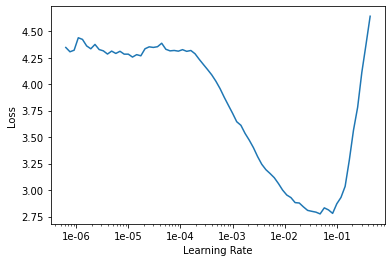

In [103]:
learn.lr_find()
learn.recorder.plot()

In [104]:
lr = 5e-03
learn.fit_one_cycle(3, max_lr=slice(lr/100, lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.962876,0.758384,0.799290,00:42
1,0.587420,0.336313,0.914742,00:42
2,0.326546,0.234664,0.925400,00:42


In [105]:
learn.save('score-92054')

In [106]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


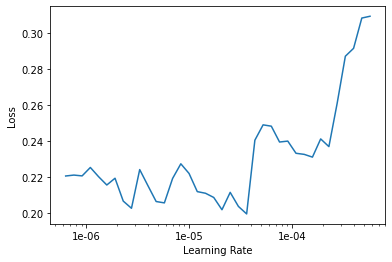

In [107]:
learn.lr_find()
learn.recorder.plot()

In [109]:
lr = 5e-06
learn.fit_one_cycle(15, max_lr=slice(lr/100, lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.226870,0.233402,0.925400,00:54
1,0.249688,0.218187,0.939609,00:54
2,0.249926,0.217406,0.934281,00:54
3,0.262872,0.226292,0.930728,00:54
4,0.224498,0.218679,0.925400,00:54
5,0.255644,0.215712,0.937833,00:54
6,0.230841,0.217145,0.930728,00:54
7,0.233544,0.214029,0.932504,00:54
8,0.257432,0.213258,0.932504,00:54
9,0.215319,0.228199,0.934281,00:54


In [110]:
learn.save('score-9360')

In [111]:
# Load data
batch_size = 16
size = 256
data = ImageDataBunch.from_folder(path="data", train="train", test="test", 
                                  valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=size, 
                                  bs=batch_size
                                  ).normalize(imagenet_stats)

In [112]:
learn = cnn_learner(data, models.resnet152, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


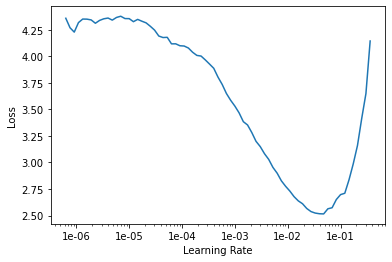

In [113]:
learn.lr_find()
learn.recorder.plot()

In [115]:
lr = 1e-03
learn.fit_one_cycle(5, max_lr=slice(lr/100, lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.799438,0.471770,0.838366,00:52
1,0.672000,0.384657,0.875666,00:52
2,0.500747,0.344911,0.880995,00:51
3,0.363193,0.292073,0.902309,00:52
4,0.292874,0.268215,0.905861,00:51


In [116]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


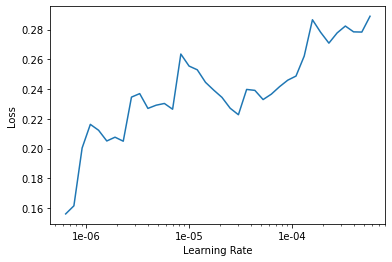

In [117]:
learn.lr_find()
learn.recorder.plot()

In [119]:
lr = 2e-05
learn.fit_one_cycle(5, max_lr=slice(lr/100, lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.261214,0.254958,0.927176,01:12
1,0.247543,0.255342,0.923623,01:12
2,0.253300,0.246016,0.912966,01:12
3,0.200441,0.240497,0.923623,01:12
4,0.222134,0.234667,0.916519,01:12


In [120]:
# Load data
batch_size = 16
size = 256
data = ImageDataBunch.from_folder(path="data", train="train", test="test", 
                                  valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=size, 
                                  bs=batch_size
                                  ).normalize(imagenet_stats)
learn = cnn_learner(data, models.densenet201, metrics=accuracy)

In [123]:
best = learn.load('score-9502')

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


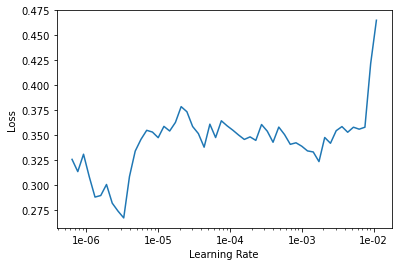

In [126]:
best.lr_find()
best.recorder.plot()

In [129]:
lr = 1.2e-06
best.fit(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.332978,0.153811,0.959147,00:40
1,0.336183,0.285485,0.920071,00:41
2,0.261964,0.175570,0.944938,00:41
3,0.241887,0.133379,0.959147,00:41
4,0.195525,0.129707,0.957371,00:41
5,0.182971,0.201832,0.950266,00:41
6,0.205065,0.211567,0.936057,00:41


KeyboardInterrupt: ignored

In [130]:
best = learn.load('score-9502')
best.fit(5, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.236067,0.060487,0.971581,00:41
1,0.204401,0.062086,0.971581,00:42
2,0.203993,0.046979,0.975133,00:41
3,0.230693,0.050995,0.978686,00:41
4,0.257481,0.050207,0.980462,00:42


In [131]:
best.fit(5, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.209181,0.045604,0.976909,00:41
1,0.183787,0.052799,0.973357,00:41
2,0.203250,0.052955,0.976909,00:41
3,0.206003,0.057004,0.973357,00:42
4,0.250646,0.046326,0.978686,00:41


In [132]:
best.fit(15, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.180766,0.050281,0.973357,00:41
1,0.221392,0.049172,0.975133,00:41
2,0.257105,0.051351,0.975133,00:41
3,0.179687,0.051753,0.973357,00:42
4,0.229810,0.049437,0.973357,00:41
5,0.222292,0.054137,0.969805,00:41
6,0.180833,0.048955,0.978686,00:42
7,0.216406,0.054056,0.971581,00:42
8,0.226117,0.048727,0.975133,00:42
9,0.182143,0.061721,0.976909,00:41
